# 图像融合

# 1. 图像融合

# OpenCV 图像融合 (Image Fusion) 知识点详解

本笔记基于 `08_图像融合.ipynb` 文件，详细讲解了 OpenCV 中图像融合的核心概念、操作步骤以及代码实现。

---

## 1. 核心概念：为什么需要图像融合？

在图像处理中，我们经常需要将两张图片“叠加”在一起。
* **直接相加 (`+`)**：容易导致像素值超过 255，产生过曝（一片白）的现象。
* **图像融合 (`cv2.addWeighted`)**：可以给两张图片分配不同的**权重 (Weight)**，让它们以一种透明混合的方式叠加，效果更自然。

---

## 2. 关键步骤与代码演示

### 2.1 图像尺寸调整 (Resize)
**知识点**：进行图像融合的前提是**两张图片的尺寸（形状）必须完全一致**。如果尺寸不同，OpenCV 会报错。

* **函数**：`cv2.resize(img, (width, height))`
* **代码示例**：
    ```python
    import cv2
    
    # 1. 读取两张图片
    img_cat = cv2.imread('01_Picture/01_cat.jpg')
    img_dog = cv2.imread('01_Picture/03_dog.jpg')
    
    # 2. 检查尺寸 (发现不一样)
    print(img_cat.shape)  # 例如: (414, 500, 3)
    print(img_dog.shape)  # 例如: (429, 499, 3)
    
    # 3. 强制调整尺寸 (把狗变得和猫一样大)
    # 注意：cv2.resize 的参数是 (宽, 高)，而 shape 属性是 (高, 宽)
    # 所以这里取 shape[1] 是宽，shape[0] 是高
    img_dog = cv2.resize(img_dog, (img_cat.shape[1], img_cat.shape[0]))
    
    # 4. 再次检查 (现在一样了)
    print(img_dog.shape)  # (414, 500, 3)
    ```

### 2.2 图像加权融合 (Weighted Add)
**知识点**：这是图像融合的核心。公式如下：
$$Target = \alpha \cdot img1 + \beta \cdot img2 + \gamma$$
其中：
* $\alpha$：第一张图片的权重
* $\beta$：第二张图片的权重
* $\gamma$：亮度调节量 (bias)

* **函数**：`cv2.addWeighted(src1, alpha, src2, beta, gamma)`
* **代码示例**：
    ```python
    # 融合图片：猫占 40%，狗占 60%，亮度不调整 (0)
    res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)
    
    # 显示结果
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) # 记得转RGB显示
    plt.show()
    ```

---

## 3. 常见问题 (FAQ)

**Q: 为什么要用 `cv2.resize`？直接加不行吗？**
A: 不行。矩阵加法要求两个矩阵的维度（行、列、通道数）必须完全一致。就像你不能把一个 3x3 的积木强行盖在一个 4x4 的积木上一样。

**Q: `cv2.resize` 的参数 `(500, 414)` 是什么意思？**
A: `cv2.resize` 的第二个参数是目标尺寸 `(width, height)`。
* `width` (宽) 对应的是列数 (columns)。
* `height` (高) 对应的是行数 (rows)。
* 这与 `img.shape` 返回的 `(height, width, channels)` 顺序刚好相反，写代码时要特别注意。

**Q: 权重之和必须是 1 吗？**
A: 不一定，但通常建议 $\alpha + \beta = 1$，这样可以保证融合后的图像亮度与原图保持在一个合理的范围内，不会太亮或太暗。

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

## 1.1 图像变换

In [2]:
img_cat = cv2.imread('01_Picture/01_cat.jpg')
img_dog = cv2.imread('01_Picture/03_dog.jpg')

print(img_cat.shape)
print(img_dog.shape)
img_cat+img_dog # 不同数据大小不能执行数值计算操作

(414, 500, 3)
(429, 499, 3)


ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [4]:
print(img_cat.shape)
print(img_dog.shape)
img_dog = cv2.resize(img_dog,(img_cat.shape[1],img_cat.shape[0]))
img_dog.shape

(414, 500, 3)
(414, 500, 3)


(414, 500, 3)

## 1.2 图像融合

(414, 500, 3)


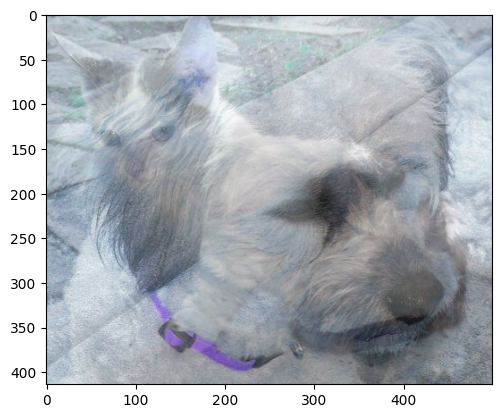

In [6]:
res = cv2.addWeighted(img_cat,0.4,img_dog,0.6,0) # img_cat 的权重为 0.4，img_dog 的权重为 0.6 
print(img_dog.shape)
plt.imshow(res)